<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/SignalsSystemsReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some results from "signals and systems"


## Linear-algebraic view of signals
- Any discrete-time signal $x(t)$ can be thought of as a point in signal space
- We can choose various co-ordinate systems for this space by choosing different sets of signals as axes
- If we choose {$\delta(t)$, $\delta(t-1)$, $\delta(t-2)$, ...} as the axes, we get the simple "time-domain" representation:
$$ x(t) = \sum_k x(k)\delta(t-k) $$
- If we instead choose complex exponentials with different frequencies $f$ as axes, we get the "frequency-domain representation:
$$ x(t) = \int_f X(f) e^{j2\pi ft} $$
- So the co-ordinate of $x(t)$ along $\delta(t-k)$ is just $x(k)$. The co-ordinate of $x(t)$ along $e^{j2\pi ft}$ is $X(f)$.
- We can find the co-ordinate of a signal $x(t)$ along any axis $a(t)$ (note that axes are also signals in their own right) by computing the inner product between them:
$$ \langle x(t),a(t) \rangle = \sum_t x(t)a^{*}(t) $$
- We can find $X(f)$ by calculating the inner product:
$$ X(f) = \sum_t x(t) e^{-j2\pi ft} $$
The collection of $X(f)$ values across different values of $f$ is called the Fourier transform.


## LTI systems

- If we measure the output $h(t)$ we get when $\delta(t)$ as input, we can predict the output $y(t)$ for any other input $x(t)$, using the "convolution operation", which follows from representing $x(t)$ using the time-domain impulses as axes:
$$ y(t) = \sum_k x(k) h(t - k) = x(t) \star h(t) \$$

- Complex exponentials are eigenfunctions of LTI systems, so they just scaled by a complex constant when going through the system:
$$ e^{j2\pi f t} \rightarrow H(f)e^{j2\pi ft} $$
The set of value of $H(f)$ for different values of $f$ is called the "transfer function" of the system.
For real sinusoids (which we can make measurements with), the LTI system will introduce a scaling *and* phase-shift:
$$ cos(2\pi ft) \rightarrow |H(f)| cos(2\pi ft + \angle{H(f)}) $$

- Because our signals can be represented with complex exponentials as axes, we can again use linearity to see how LTI systems effectively are frequency filters:
$$ y(t) = \int_f X(f) H(f) e^{j2\pi ft} $$
This means that

$$ Y(f) = X(f) H(f) $$

- From the above, we can see that $x(t) \star h(t)$, in time becomes $Y(f) = X(f)H(f)$. This is true regardless of what the two signals or, i.e., convolution in time is equivalent to multiplication in frequency (and vice versa too).

## Some loose ends: What frequency values do we need to make up a full set of axes for the signal space?

- What are the units of time and frequency?
- What happens if we increase $f$ by 1, when time is measured in samples?
$$ e^{2\pi (f + 1)t} = e^{2\pi ft}e^{j2\pi t} = e^{2\pi ft}$$
So the frequency axis goes from -1/2 to 1/2 (in units of sampling rate)
- What does this mean for sampling rates that we need?
Frequencies that are separates by sampling rate $fs$ are indistinguishable ("aliasing"). So sample at least twice as fast as the highest frequency in your signal of interest.
- This means, you'll need to know the rough characteristics of your signal to choose an appropriate sampling rate. For instance, it is easy to imagine that room temperature need **not** be sampled every microsecond.
- In this course we will assume that we have discrete-time data with an adequate samling rate (no aliasing).


In [ ]:
import numpy as np
import pylab as pl

def compass(theta=np.pi/2):
  pl.polar([0, theta], [0, 1.], linewidth=2)
  pl.grid(False)
  pl.xticks([])
  pl.yticks([])


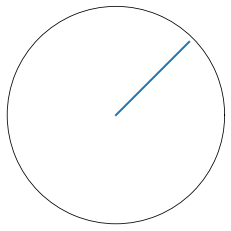

In [ ]:
compass(theta=np.pi/4)  # Helps simulate the so-called "wagon-wheel" effect


## Fourier transforms of some simple signals, and time-frequency uncertainty

First, let's consider a simple sinusoid.

Text(0.5, 0, 'Time (s)')

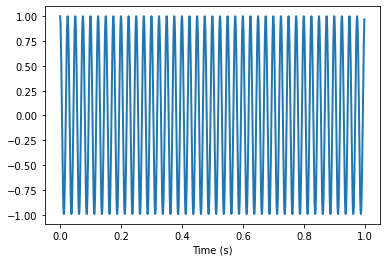

In [ ]:
fs = 1000.0
t = np.arange(0, 1.0, 1/fs)
x = np.cos(2 * np.pi * 40 * t)
pl.plot(t, x, linewidth=2)
pl.xlabel('Time (s)')


Text(0.5, 0, 'Frequency (Hz)')

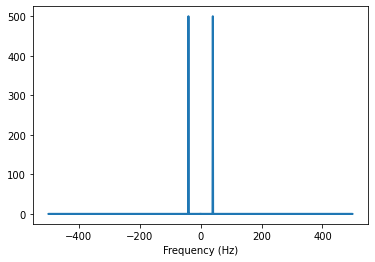

In [ ]:
Xf = np.fft.fft(x)
f = np.fft.fftfreq(Xf.shape[0]) * fs
pl.plot(f, np.abs(Xf), linewidth=2)
pl.xlabel('Frequency (Hz)')

(-3.141592653589793, 3.141592653589793)

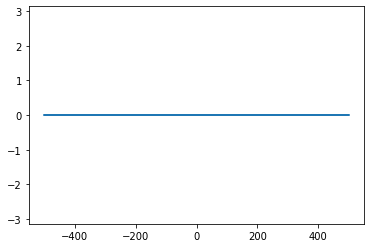

In [ ]:
phi = np.angle(Xf)
phi[np.abs(Xf) < 100] = 0
pl.plot(f, phi)
pl.ylim(-np.pi, np.pi)

Now, let's consider a rectangular signal, and explore time-frequency uncertainty. In quantum mechanics, this mathematical fact about Fourier transforms translates to the well-known Heisenberg uncertainty principle.

Text(0.5, 0, 'Frequency (Hz)')

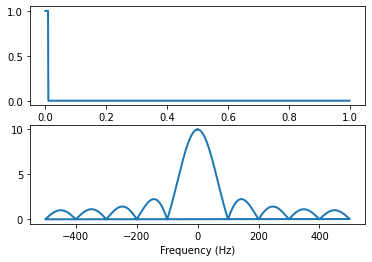

In [ ]:
fs = 1000.0
t = np.arange(0, 1.0, 1/fs)
x = np.zeros(t.shape)
T = 0.01  # Length of rectangular window
x[t < T] = 1

pl.subplot(211)
pl.plot(t, x, linewidth=2)

Xf = np.fft.fft(x)
f = np.fft.fftfreq(Xf.shape[0]) * fs
pl.subplot(212)
pl.plot(f, np.abs(Xf), linewidth=2)
pl.xlabel('Frequency (Hz)')


Now, let's consider a periodic signal that is not sinusoidal. Example of such signals include voiced speech (like if you hold a vowel, your vocal folds vibrate with some period of vibration).

What frequency content do you expect?

Text(0.5, 0, 'Time (s)')

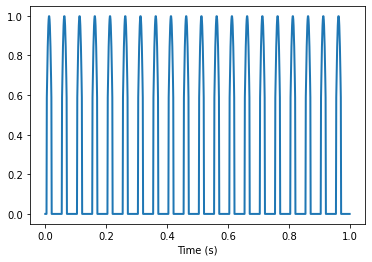

In [ ]:
fs = 1000.0
t = np.arange(0, 1.0, 1/fs)
x = np.sin(2 * np.pi * 20 * t)
x[x <  0.5] = 0

pl.plot(t, x, linewidth=2)
pl.xlabel('Time (s)')


Text(0.5, 0, 'Frequency (Hz)')

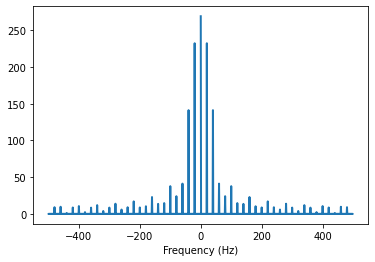

In [ ]:
Xf = np.fft.fft(x)
f = np.fft.fftfreq(Xf.shape[0]) * fs
pl.plot(f, np.abs(Xf), linewidth=2)
pl.xlabel('Frequency (Hz)')

## Illustration of LTI system characterization

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
datadir = '/content/gdrive/My Drive/BME511Data/'
from scipy import io
datdict = io.loadmat(datadir + 'stalbans.mat', squeeze_me=True)

(0.0, 0.2)

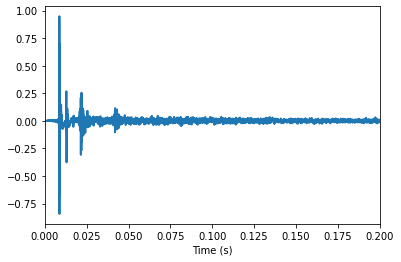

In [ ]:
h = datdict['h']
fs = datdict['fs']

t = np.arange(0, h.shape[0]/fs, 1/fs)
pl.plot(t, h, linewidth=2)
pl.xlabel('Time (s)')
pl.xlim(0, 0.2)

In [ ]:
from IPython.display import Audio
Audio(data=h, rate=fs)
